- This notebook contains the code to generate the plots for Gender and Dialogue experiments.

In [1]:
import os
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=12.5)    # legend fontsize

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Plot percent-dialog in our "dialog" data set:

In [2]:
path = '../dialog-results/pct_dialog/'

Y = []
X = []
for fname in os.listdir(path):
    if not fname.endswith('pickle'):
        continue
    with open(path+fname, 'rb') as f:
        l = pickle.load(f)
    Y.append(fname[:-7].split('_')[-1])
    X.append(l)

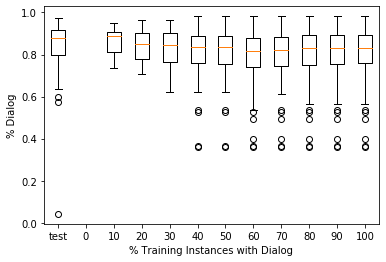

In [8]:
plt.boxplot(X, labels=Y)
plt.xlabel('% Training Instances with Dialog')
plt.ylabel('% Dialog')
plt.show()

## Other Dialog Plots:

In [2]:
main_df = pd.read_csv('../dialog-results/dialog_bias_results_500words.tsv', delimiter='\t')
main_df.rename(columns={'Algorithm':'Classifier'}, inplace=True)
main_df.sort_values('Relative-Entropy', ascending=False)

,Classifier,% Train Set with Dialog,F1-score,Precision,Recall,Accuracy,TP-dialog,Relative-Entropy
0,BERT,0,0.6194,0.8727,0.48,0.705,"{'ficNoDialog': 1.0, 'ficWithDialog': 0.0}",0.693147
2,BERT,100,0.6536,0.9434,0.50,0.735,"{'ficWithDialog': 1.0, 'ficNoDialog': 0.0}",0.693147
13,SVM,100,0.7500,0.8214,0.69,0.770,"{'ficNoDialog': 0.3333, 'ficWithDialog': 0.6667}",0.056656
11,SVM,0,0.7330,0.7692,0.70,0.745,"{'ficNoDialog': 0.6429, 'ficWithDialog': 0.3571}",0.041416
21,SVM,90,0.8061,0.8229,0.79,0.810,"{'ficNoDialog': 0.4177, 'ficWithDialog': 0.5823}",0.013608
10,BERT,90,0.9167,0.9565,0.88,0.920,"{'ficWithDialog': 0.5682, 'ficNoDialog': 0.4318}",0.009332
20,SVM,80,0.8515,0.8431,0.86,0.850,"{'ficNoDialog': 0.4651, 'ficWithDialog': 0.5349}",0.002438
19,SVM,70,0.8390,0.8190,0.86,0.835,"{'ficNoDialog': 0.4651, 'ficWithDialog': 0.5349}",0.002438
9,BERT,80,0.9400,0.9400,0.94,0.940,"{'ficWithDialog': 0.5319, 'ficNoDialog': 0.4681}",0.002037
1,BERT,10,0.9082,0.9271,0.89,0.910,"{'ficWithDialog': 0.4719, 'ficNoDialog': 0.5281}",0.001580


In [3]:
path = "../figures/dialog-fig/"
def plot(y_axis):
    ax = sns.lineplot(x="% Train Set with Dialog", y=y_axis, hue='Classifier', data=main_df)
    ax.figure.savefig(path+y_axis+"_500Words.png", bbox_inches="tight")

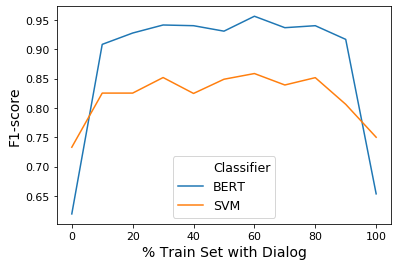

In [4]:
plot('F1-score')

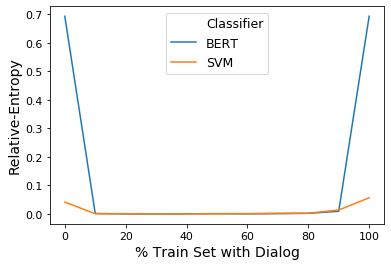

In [5]:
plot('Relative-Entropy')

## Gender Plots:

In [6]:
main_df = pd.read_csv('../gender-results/gender_bias_results_500words.tsv', delimiter='\t')
main_df.rename(columns={'Algorithm':'Classifier'}, inplace=True)
print(main_df.shape)
main_df.sort_values('Relative-Entropy', ascending=False)

(22, 8)


,Classifier,% Train Set by Male Author,F1-score,Precision,Recall,Accuracy,TP-gender,Relative-Entropy
11,SVM,0,0.8932,0.8679,0.92,0.890,"{'M_fic': 0.4565, 'F_fic': 0.5435}",0.003789
12,SVM,10,0.9048,0.8636,0.95,0.900,"{'M_fic': 0.4737, 'F_fic': 0.5263}",0.001384
14,SVM,20,0.8868,0.8393,0.94,0.880,"{'M_fic': 0.4787, 'F_fic': 0.5213}",0.000908
21,SVM,90,0.9100,0.8649,0.96,0.905,"{'M_fic': 0.4896, 'F_fic': 0.5104}",0.000216
15,SVM,30,0.9032,0.8376,0.98,0.895,"{'M_fic': 0.4898, 'F_fic': 0.5102}",0.000208
6,BERT,50,0.9608,0.9423,0.98,0.960,"{'M_fic': 0.4898, 'F_fic': 0.5102}",0.000208
16,SVM,40,0.9032,0.8376,0.98,0.895,"{'M_fic': 0.4898, 'F_fic': 0.5102}",0.000208
17,SVM,50,0.9029,0.8774,0.93,0.900,"{'M_fic': 0.4946, 'F_fic': 0.5054}",0.000058
13,SVM,100,0.9048,0.8636,0.95,0.900,"{'M_fic': 0.5053, 'F_fic': 0.4947}",0.000056
19,SVM,70,0.8962,0.8482,0.95,0.890,"{'M_fic': 0.4947, 'F_fic': 0.5053}",0.000056


In [7]:
path = "../figures/gender-fig/"
def plot(y_axis):
    ax = sns.lineplot(x="% Train Set by Male Author", y=y_axis, hue='Classifier', data=main_df)
    if y_axis.startswith('F'):
        ax.set_ylim([0.87,0.97])
    else:
        ax.set_ylim([-0.001,0.01])
    ax.figure.savefig(path+y_axis+"_500Words.png", bbox_inches="tight")

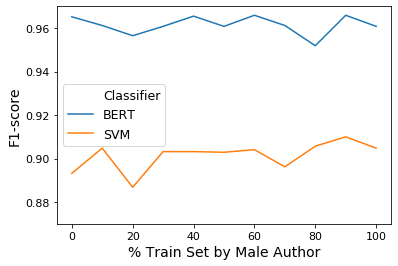

In [8]:
plot('F1-score')

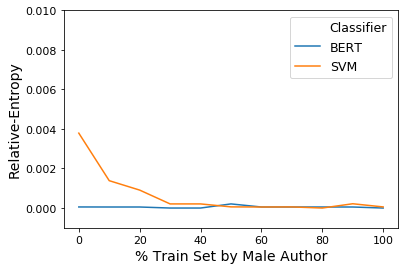

In [9]:
plot('Relative-Entropy')

# fin.